In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import QuantileTransformer

In [3]:
#https://dacon.io/codeshare/1877
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')




In [6]:
country_map = {}

for i, c in enumerate(train['country'].unique()):
    country_map[c] = i
    

In [7]:
train['country'] = train['country'].map(country_map)
test['country'] = test['country'].map(country_map) #country열 Mapping

In [8]:
test = test.fillna(0)
train = train.fillna(0)#test 결측치 0으로 채우기

<AxesSubplot:>

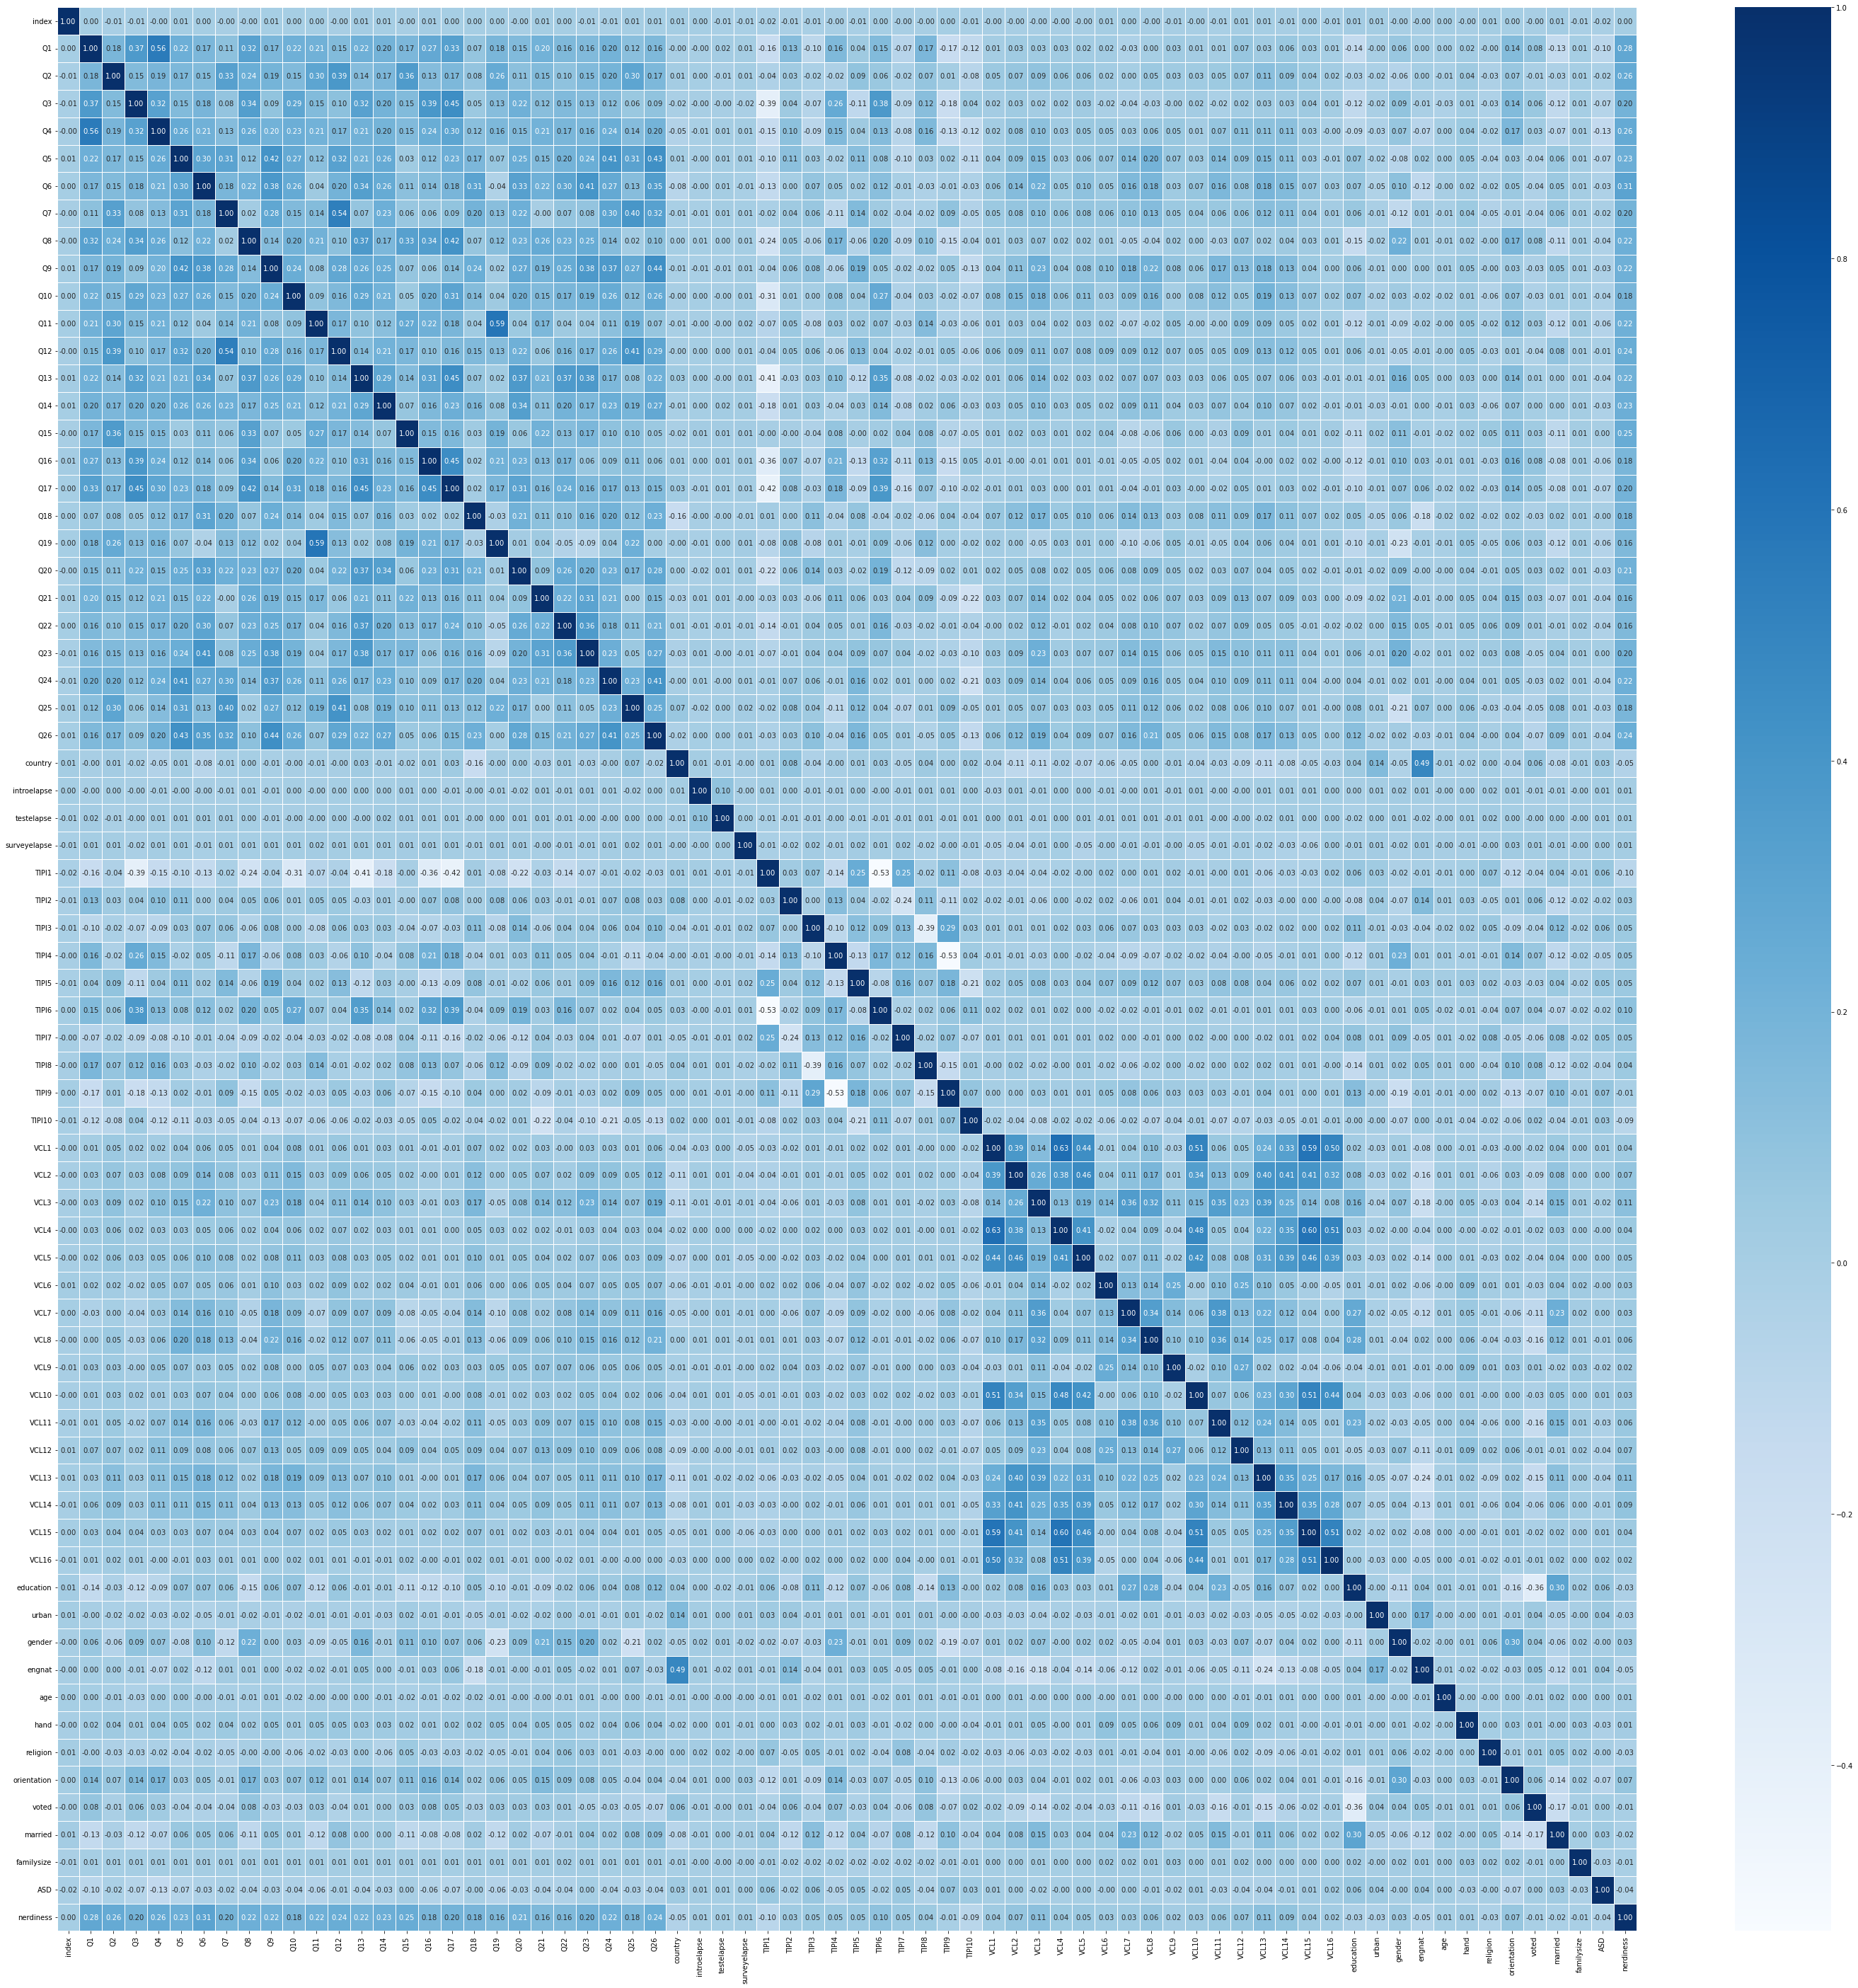

In [9]:
plt.figure(figsize=(50,50))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [116]:
'''
x_train = train.loc[:, 'Q1':'ASD']
y_train = train['nerdiness']

x_test = test.loc[:, 'Q1':'ASD'] #index와 nerdiness열 제외
'''




"\nx_train = train.loc[:, 'Q1':'ASD']\ny_train = train['nerdiness']\n\nx_test = test.loc[:, 'Q1':'ASD'] #index와 nerdiness열 제외\n"

In [117]:
train_nor=train
test_nor= test

for i in range(27,68,1):
    train=train.drop(train.columns[26],axis=1)
    test=test.drop(test.columns[26],axis=1)

train=train.drop(columns=['index','familysize','ASD'],axis=1)

test=test.drop(columns=['index','familysize','ASD'],axis=1)

y_train=train['nerdiness']
x_train=train.drop('nerdiness',axis=1)
x_test = test

x_train['VCL4']=train_nor['VCL4']
x_train['TIPI7']=train_nor['TIPI7']     

x_test['VCL4']=test_nor['VCL4']
x_test['TIPI7']=test_nor['TIPI7'] 

In [120]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs=-1)

from sklearn.model_selection import KFold, GridSearchCV #하이퍼파라미터 튜닝을 위한 불러오기
from sklearn.metrics import accuracy_score

model_param_grid = {'n_estimators' : [100, 1000, 3000]} # Default(100)대비 큰값으로 Dictionary구성

model_grid = GridSearchCV(model, param_grid = model_param_grid, scoring="accuracy",n_jobs=-1,verbose=1) #훈련 (장치 사양에 따라 시간이 걸릴 수 있음)
model_grid.fit(x_train, y_train)

pred = model_grid.predict_proba(x_test)[:,1] #proba를 통해 확률값으로 변환

sample['nerdiness'] = pred

'''
cv=KFold(n_splits=6, random_state=42) #교차검증

gcv=GridSearchCV(model, param_grid=model_param_grid, cv=cv, scoring='f1', n_jobs=-1)

gcv.fit(x_train.values,y_train.values)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력

model = RandomForestClassifier(n_estimators=3000, random_state=42, n_jobs=-1)

model.fit(x_train, y_train) #학습

pred = model.predict_proba(x_test)[:,1] #proba를 통해 확률값으로 변환

submission['nerdiness'] = pred

'''

Fitting 5 folds for each of 3 candidates, totalling 15 fits


"\ncv=KFold(n_splits=6, random_state=42) #교차검증\n\ngcv=GridSearchCV(model, param_grid=model_param_grid, cv=cv, scoring='f1', n_jobs=-1)\n\ngcv.fit(x_train.values,y_train.values)\nprint('final params', gcv.best_params_)   # 최적의 파라미터 값 출력\n\nmodel = RandomForestClassifier(n_estimators=3000, random_state=42, n_jobs=-1)\n\nmodel.fit(x_train, y_train) #학습\n\npred = model.predict_proba(x_test)[:,1] #proba를 통해 확률값으로 변환\n\nsubmission['nerdiness'] = pred\n\n"

In [121]:
sample['nerdiness']=sample['nerdiness'].round(2)
sample['nerdiness']=sample['nerdiness'].round(1)
sample['nerdiness']=sample['nerdiness'].round(0)
sample[sample['nerdiness']>=2]


,index,nerdiness


In [122]:
sample.to_csv('result8.4_3.csv',index=False)

In [19]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model
from lightgbm import LGBMClassifier

y = train['nerdiness']
x= train.drop('nerdiness',axis =1)
model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)
model.fit(x, y)
pred = model.predict(test)      
pred = pd.DataFrame(pred, columns=['nerdiness'])
pred = np.expm1(pred)
pred['nerdiness'].tolist()


[1.4931302070617676,
 1.699041724205017,
 2.1943016052246094,
 1.4687345027923584,
 0.845375657081604,
 0.23342294991016388,
 1.2315013408660889,
 1.5922890901565552,
 0.32951557636260986,
 0.6969000101089478,
 0.44346103072166443,
 1.2047760486602783,
 1.621125340461731,
 1.0405350923538208,
 1.5204567909240723,
 0.5904761552810669,
 0.050954174250364304,
 1.288869023323059,
 1.0069106817245483,
 1.0186165571212769,
 0.22220231592655182,
 -0.06860555708408356,
 0.8247585892677307,
 0.3989280164241791,
 0.4351109266281128,
 0.7001966238021851,
 1.003866195678711,
 1.1752833127975464,
 0.527141273021698,
 0.19683270156383514,
 0.2761787474155426,
 0.39147302508354187,
 1.1283713579177856,
 0.47699084877967834,
 1.413012146949768,
 0.10371018201112747,
 0.7411180734634399,
 0.5477418303489685,
 0.5955345034599304,
 1.3343979120254517,
 1.0843098163604736,
 0.19816279411315918,
 1.1921073198318481,
 -0.1434733271598816,
 1.2935453653335571,
 0.06465483456850052,
 1.4490644931793213,
 0.25

<BarContainer object of 69 artists>

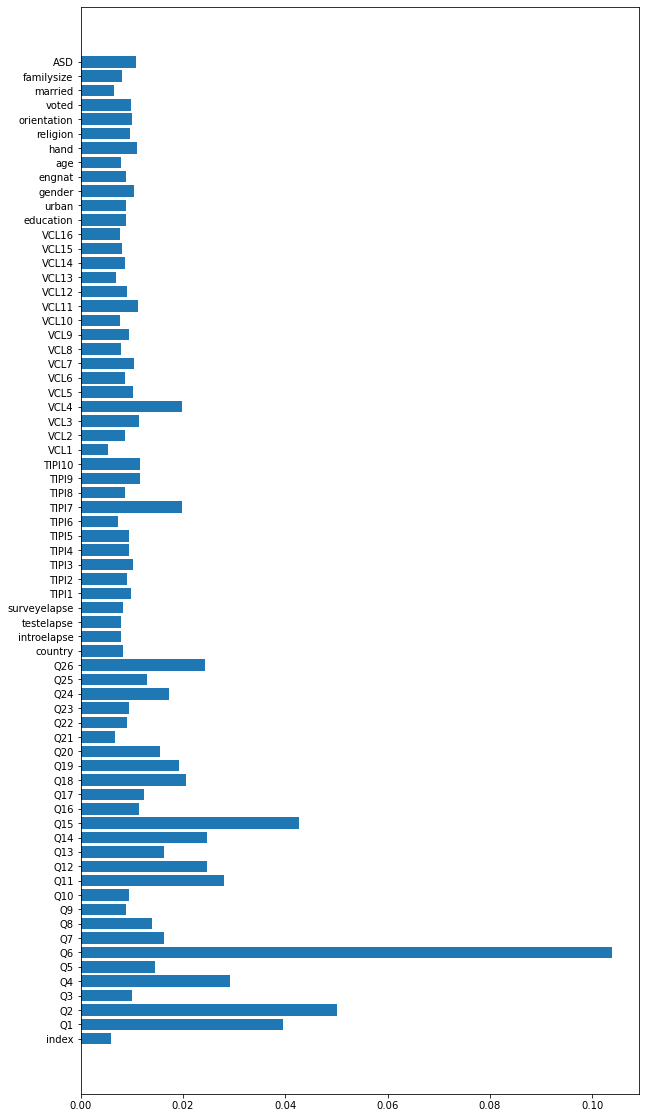

In [32]:
model.feature_importances_
plt.figure(figsize=(10,20))
plt.barh(x.columns, model.feature_importances_)

<AxesSubplot:>

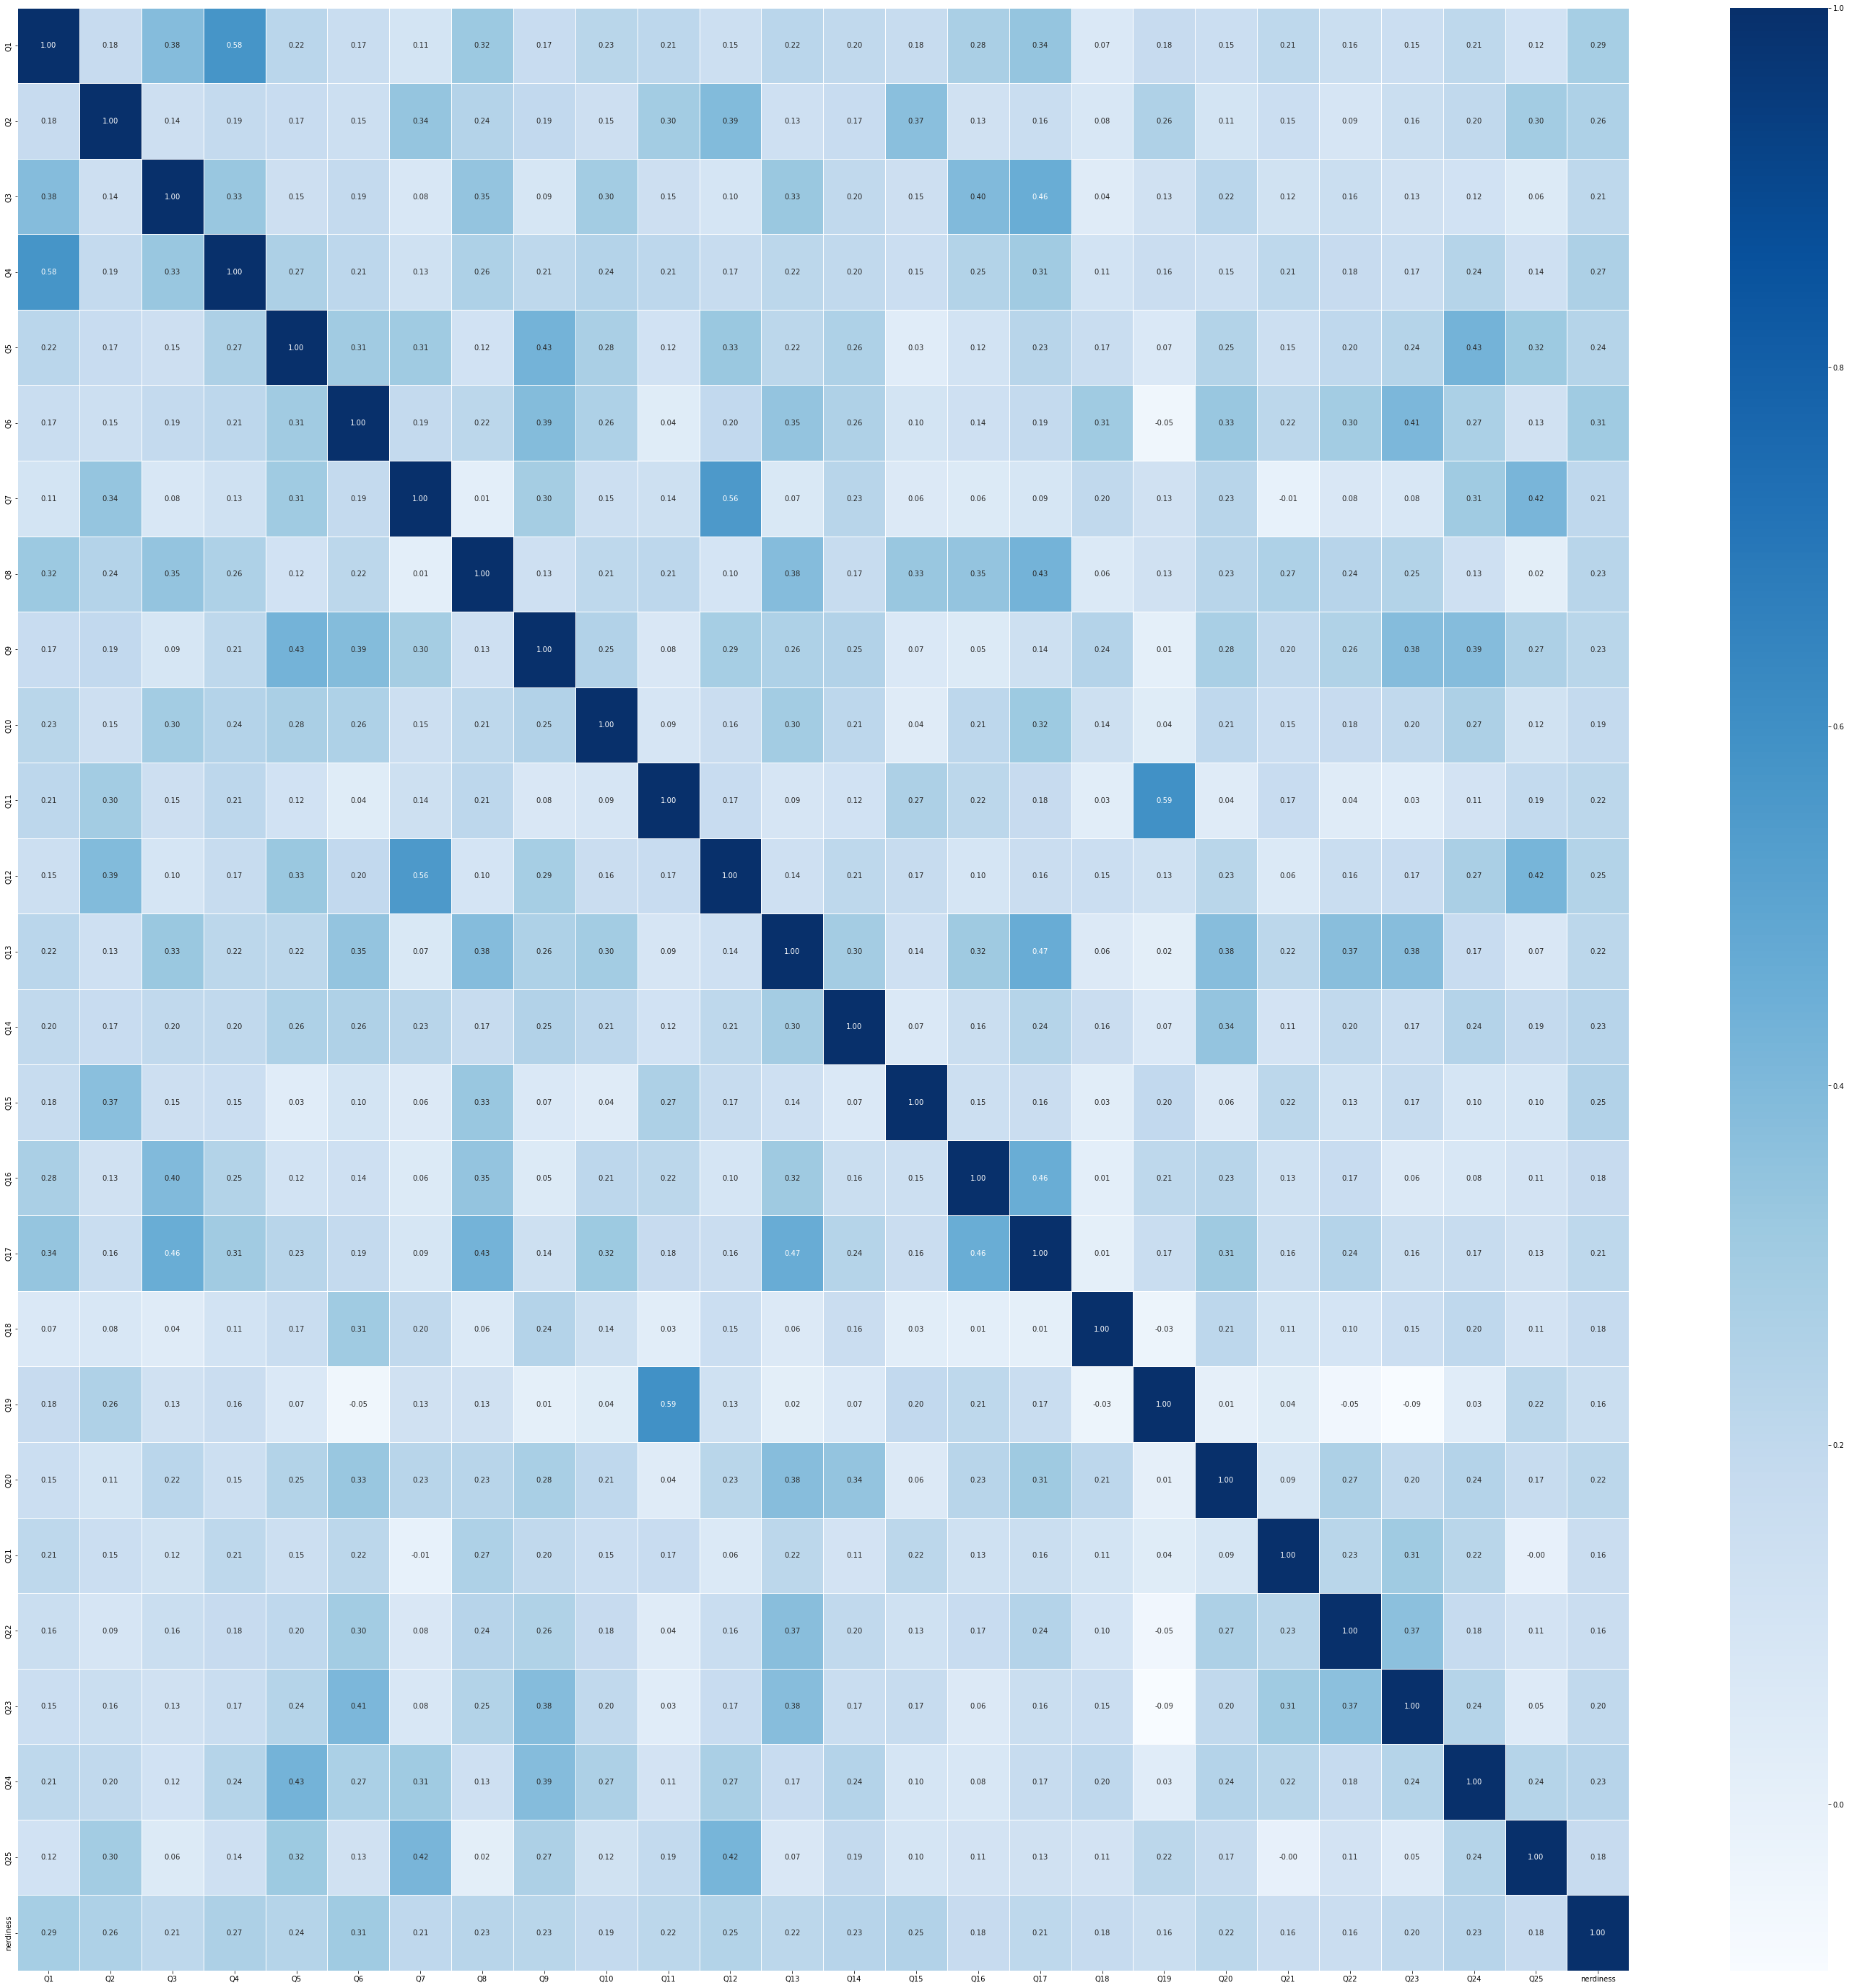

In [56]:
plt.figure(figsize=(50,50))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
sample['nerdiness'] = pred

In [58]:
sample['nerdiness']=sample['nerdiness'].round(1)
sample['nerdiness']=sample['nerdiness'].round(0)

In [73]:
sample[sample['nerdiness']>=2]

sample.at[31671,'nerdiness']=1
sample.at[31946,'nerdiness']=1

In [75]:
sample.to_csv('result8.3_4.csv',index=False)

In [76]:
sample['nerdiness']
#19645

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
35447    1.0
35448    1.0
35449    1.0
35450    0.0
35451    1.0
Name: nerdiness, Length: 35452, dtype: float32

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            15000 non-null  float64
 2   Q2            15000 non-null  float64
 3   Q3            15000 non-null  float64
 4   Q4            15000 non-null  float64
 5   Q5            15000 non-null  float64
 6   Q6            15000 non-null  float64
 7   Q7            15000 non-null  float64
 8   Q8            15000 non-null  float64
 9   Q9            15000 non-null  float64
 10  Q10           15000 non-null  float64
 11  Q11           15000 non-null  float64
 12  Q12           15000 non-null  float64
 13  Q13           15000 non-null  float64
 14  Q14           15000 non-null  float64
 15  Q15           15000 non-null  float64
 16  Q16           15000 non-null  float64
 17  Q17           15000 non-null  float64
 18  Q18           15000 non-nu